# Task2.1 图像空间的t-SNE，生成两张图象，一张表示图像空间下的域差异，另一张表示频率空间下的域差异

In [6]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.manifold import TSNE
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
 
folders = [r'G:\FedICRA\data\FAZ\Domain1\train\imgs', r'G:\FedICRA\data\FAZ\Domain2\train\imgs', r'G:\FedICRA\data\FAZ\Domain3\train\imgs',r'G:\FedICRA\data\FAZ\Domain4\train\imgs', r'G:\FedICRA\data\FAZ\Domain5\train\imgs']



'''
获取所有图像的路径以及他们的特征，并将特征压平到（1，40000）的大小
'''
def load_images_from_folders(folders):   
    img_features = []
    img_names = []

    for folder in folders:
        for root, dirs, files in os.walk(folder):
            for file in files:
                if file.endswith(('jpg', 'jpeg', 'png')):
                    img_path = os.path.join(root, file)
                    img = cv2.imread(img_path)
                    # img = cv2.resize(img, (3))  # Resize image if needed
                    img_resize = cv2.resize(img, (200,200))
                    gray_image = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
                    img_features.append(gray_image.flatten())  # Extract image features (flatten as an example)
                    img_names.append(img_path)  # Store image names
    return np.array(img_features), img_names

'''
将经过t-SNE后的数据与他们的图像对应，并绘制在一张图片里
'''
def imscatter(x, y, images, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    x, y = np.atleast_1d(x, y)
    artists = []
    print(images)
    for x0, y0, image in zip(x, y, images):
        im = cv2.imread(image)
        print(type(im))
        im = cv2.resize(im, (200, 200))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_f = OffsetImage(im, zoom=zoom)
        ab = AnnotationBbox(im_f, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists
'''
绘制数据的主函数
'''
def draw_tsne(features, imgs):
    print(f">>> t-SNE fitting")
    tsne = TSNE(n_components=2, init='pca', perplexity=30)
    Y = tsne.fit_transform(features)
    print(f"<<< fitting over")

    fig, ax = plt.subplots()
    fig.set_size_inches(50, 30)
    plt.axis('off')
    print(f">>> plotting images")
    print(Y.shape)
    imscatter(Y[:, 0], Y[:, 1], imgs, zoom=0.1, ax=ax)  
    print(f"<<< plot over")
    plt.savefig(fname='Task2_1_Image_space.png', format='png')     # 文件保存在了同文件夹下的'Image_space.png'
    plt.show()

>>> t-SNE fitting
<<< fitting over
>>> plotting images
(1332, 2)
['G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\001_M_1.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\001_N_1.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\002_D_10.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\002_M_10.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\003_D_100.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\003_M_100.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\003_N_11.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\004_D_101.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\004_N_12.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\005_D_102.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\005_M_102.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\005_N_13.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\006_M_103.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\006_N_14.png', 'G:\\FedICRA\\data\\FAZ\\Domain1\\train\\imgs\\007_D_104.png',

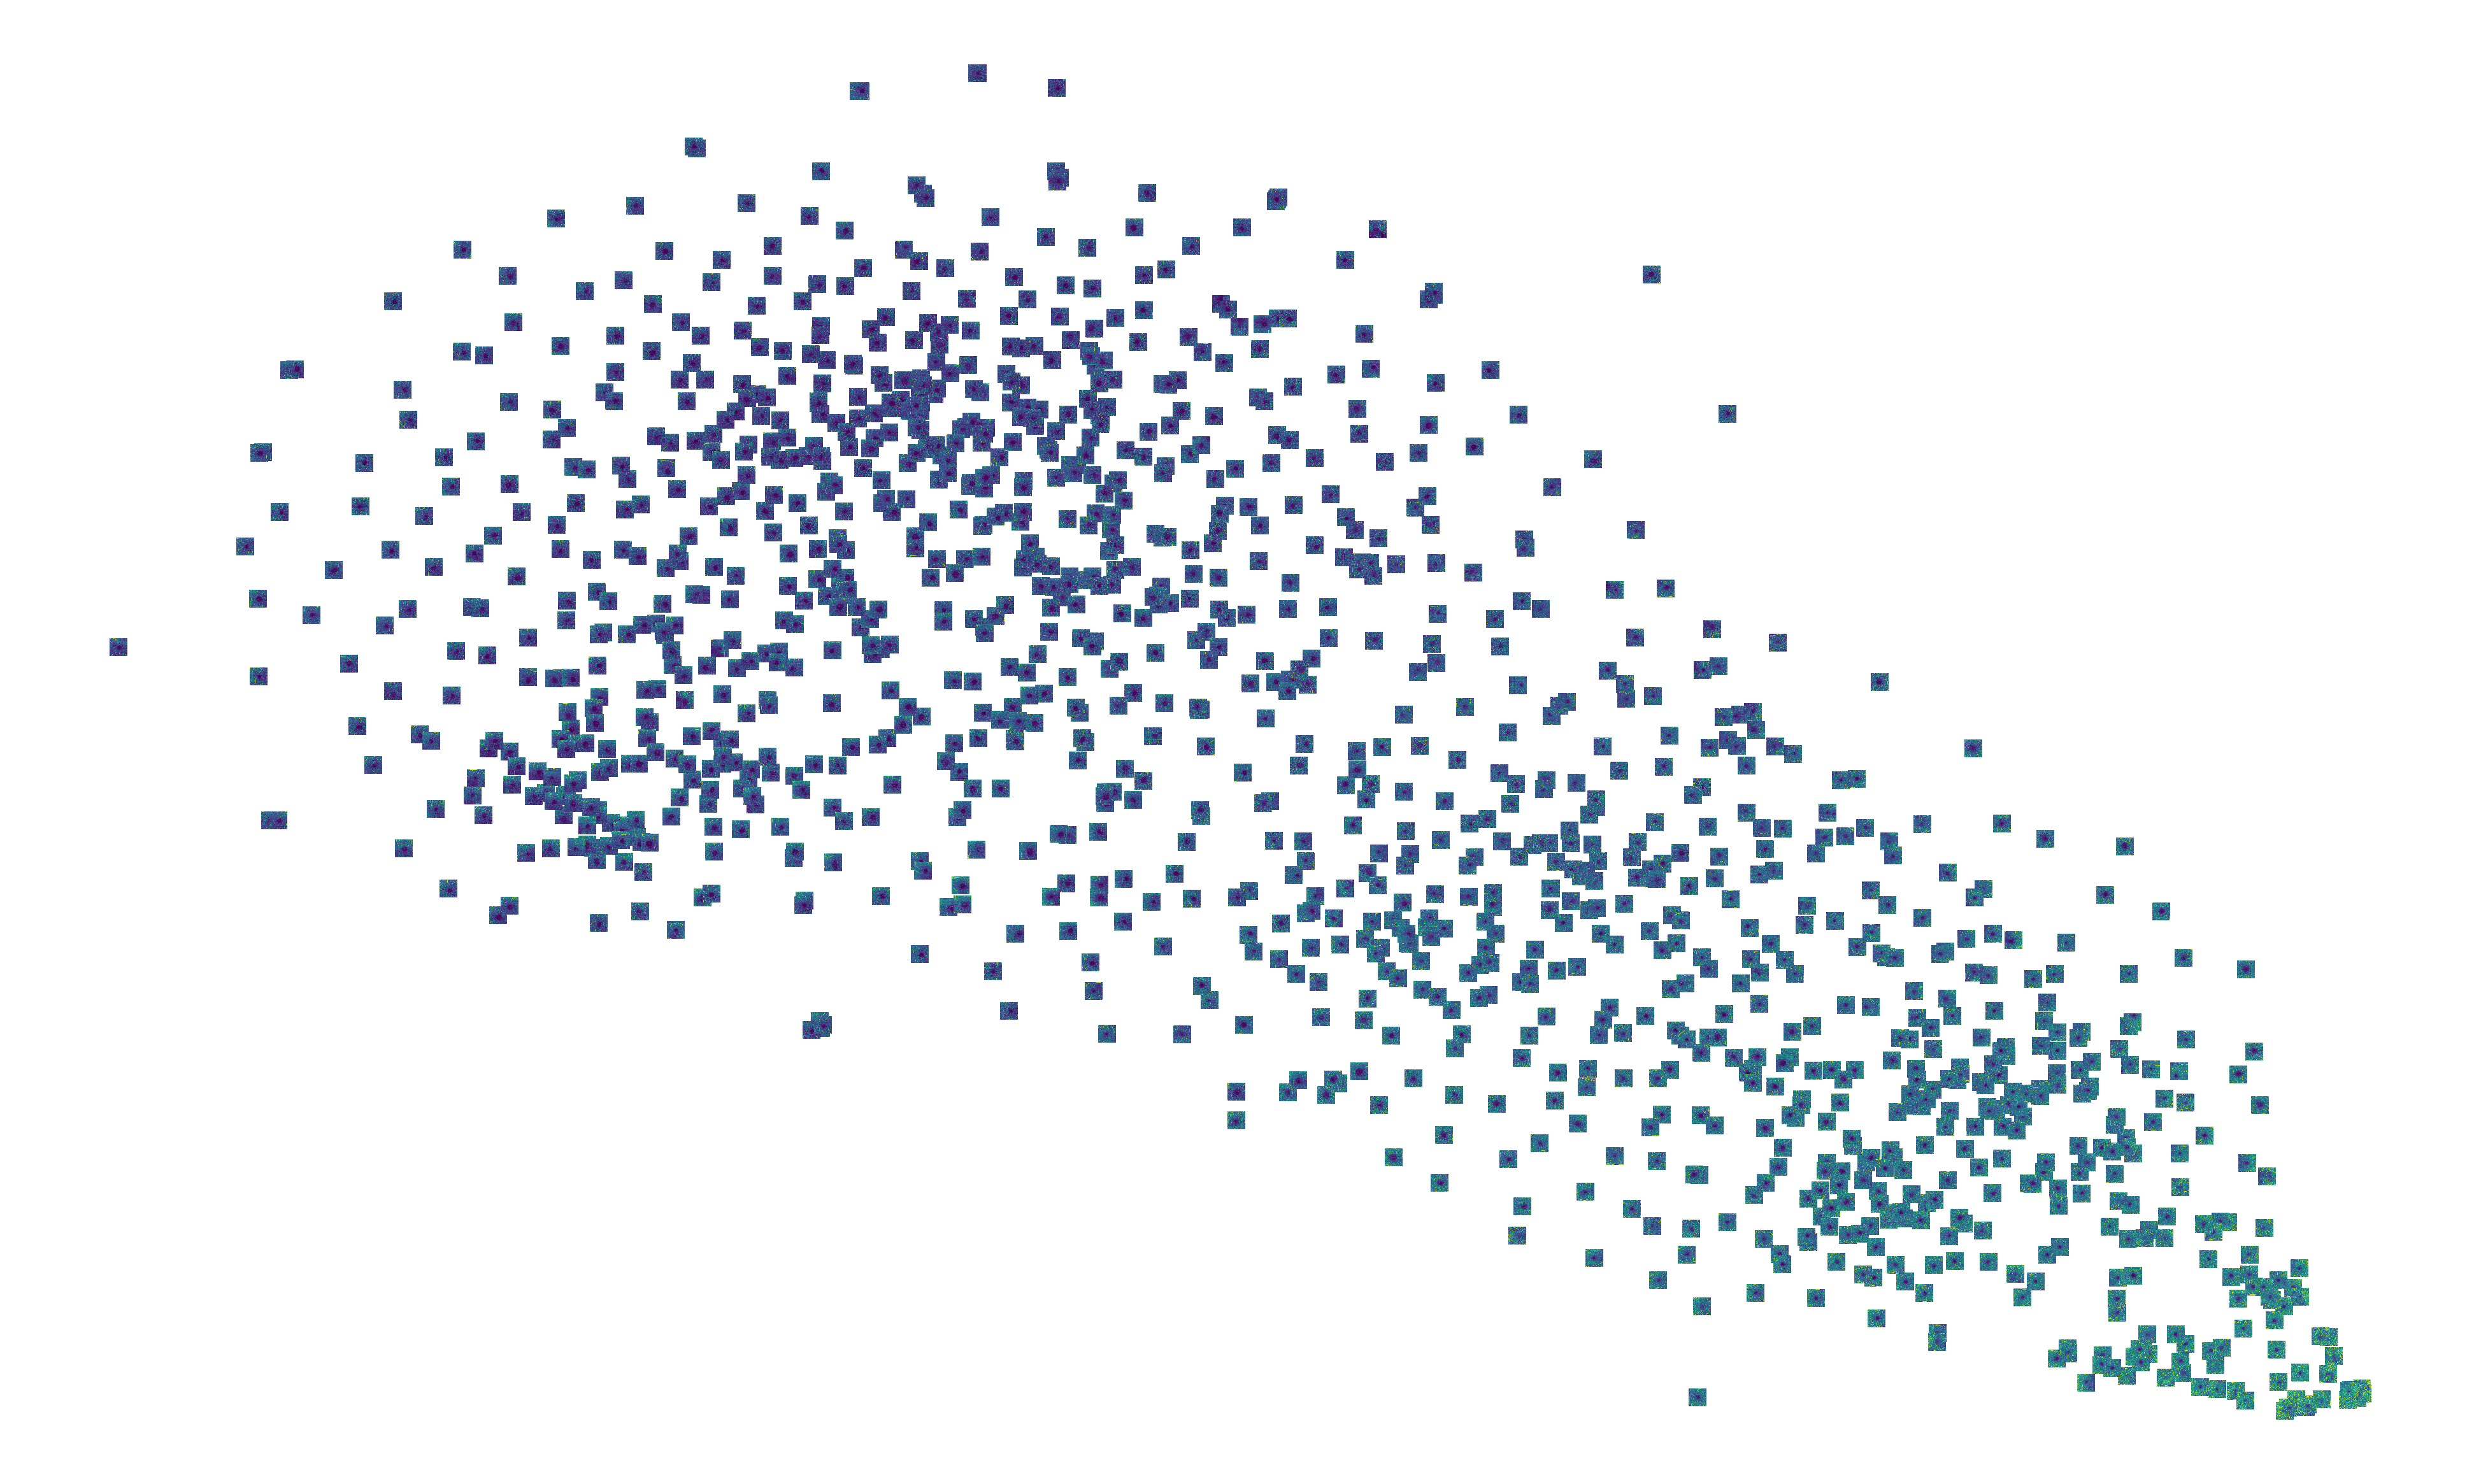

In [7]:
features, img_names = load_images_from_folders(folders)
draw_tsne(features, img_names)

# Task2.1 2D傅里叶变换特征空间的t-SNE

In [3]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.manifold import TSNE
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
 
folders = [r'G:\FedICRA\data\FAZ\Domain1\train\imgs', r'G:\FedICRA\data\FAZ\Domain2\train\imgs', r'G:\FedICRA\data\FAZ\Domain3\train\imgs',r'G:\FedICRA\data\FAZ\Domain4\train\imgs', r'G:\FedICRA\data\FAZ\Domain5\train\imgs']




def load_images_from_folders(folders):
    img_features = []
    img_names = []

    for folder in folders:
        for root, dirs, files in os.walk(folder):
            for file in files:
                if file.endswith(('jpg', 'jpeg', 'png')):
                    img_path = os.path.join(root, file)
                    img = cv2.imread(img_path)
                    # img = cv2.resize(img, (3))  # Resize image if needed
                    img_resize = cv2.resize(img, (200,200))
                    gray_image = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
                    spect = np.fft.fft2(gray_image)
                    print('The original shape of the spectrum is', spect.shape)
                    spect_amp = np.abs(spect)
                    img_features.append(spect_amp.flatten())  # Extract image features (flatten as an example)
                    img_names.append(img_path)  # Store image names
    return np.array(img_features), img_names

def imscatter(x, y, images, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    x, y = np.atleast_1d(x, y)
    artists = []
    print(images)
    for x0, y0, image in zip(x, y, images):
        im = cv2.imread(image)
        print(type(im))
        im = cv2.resize(im, (200, 200))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_f = OffsetImage(im, zoom=zoom)
        ab = AnnotationBbox(im_f, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

def draw_tsne(features, imgs):
    print(f">>> t-SNE fitting")
    tsne = TSNE(n_components=2, init='pca', perplexity=30)
    Y = tsne.fit_transform(features)
    print(f"<<< fitting over")

    fig, ax = plt.subplots()
    fig.set_size_inches(50, 30)
    plt.axis('off')
    print(f">>> plotting images")
    print(Y.shape)
    imscatter(Y[:, 0], Y[:, 1], imgs, zoom=0.1, ax=ax)  
    print(f"<<< plot over")
    plt.savefig(fname='Task2_1_2Dfourier_transform.png', format='png')   # 存储在了同文件夹下的'2Dfourier_transform.png'文件
    plt.show()


The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape of the spectrum is (200, 200)
The original shape o

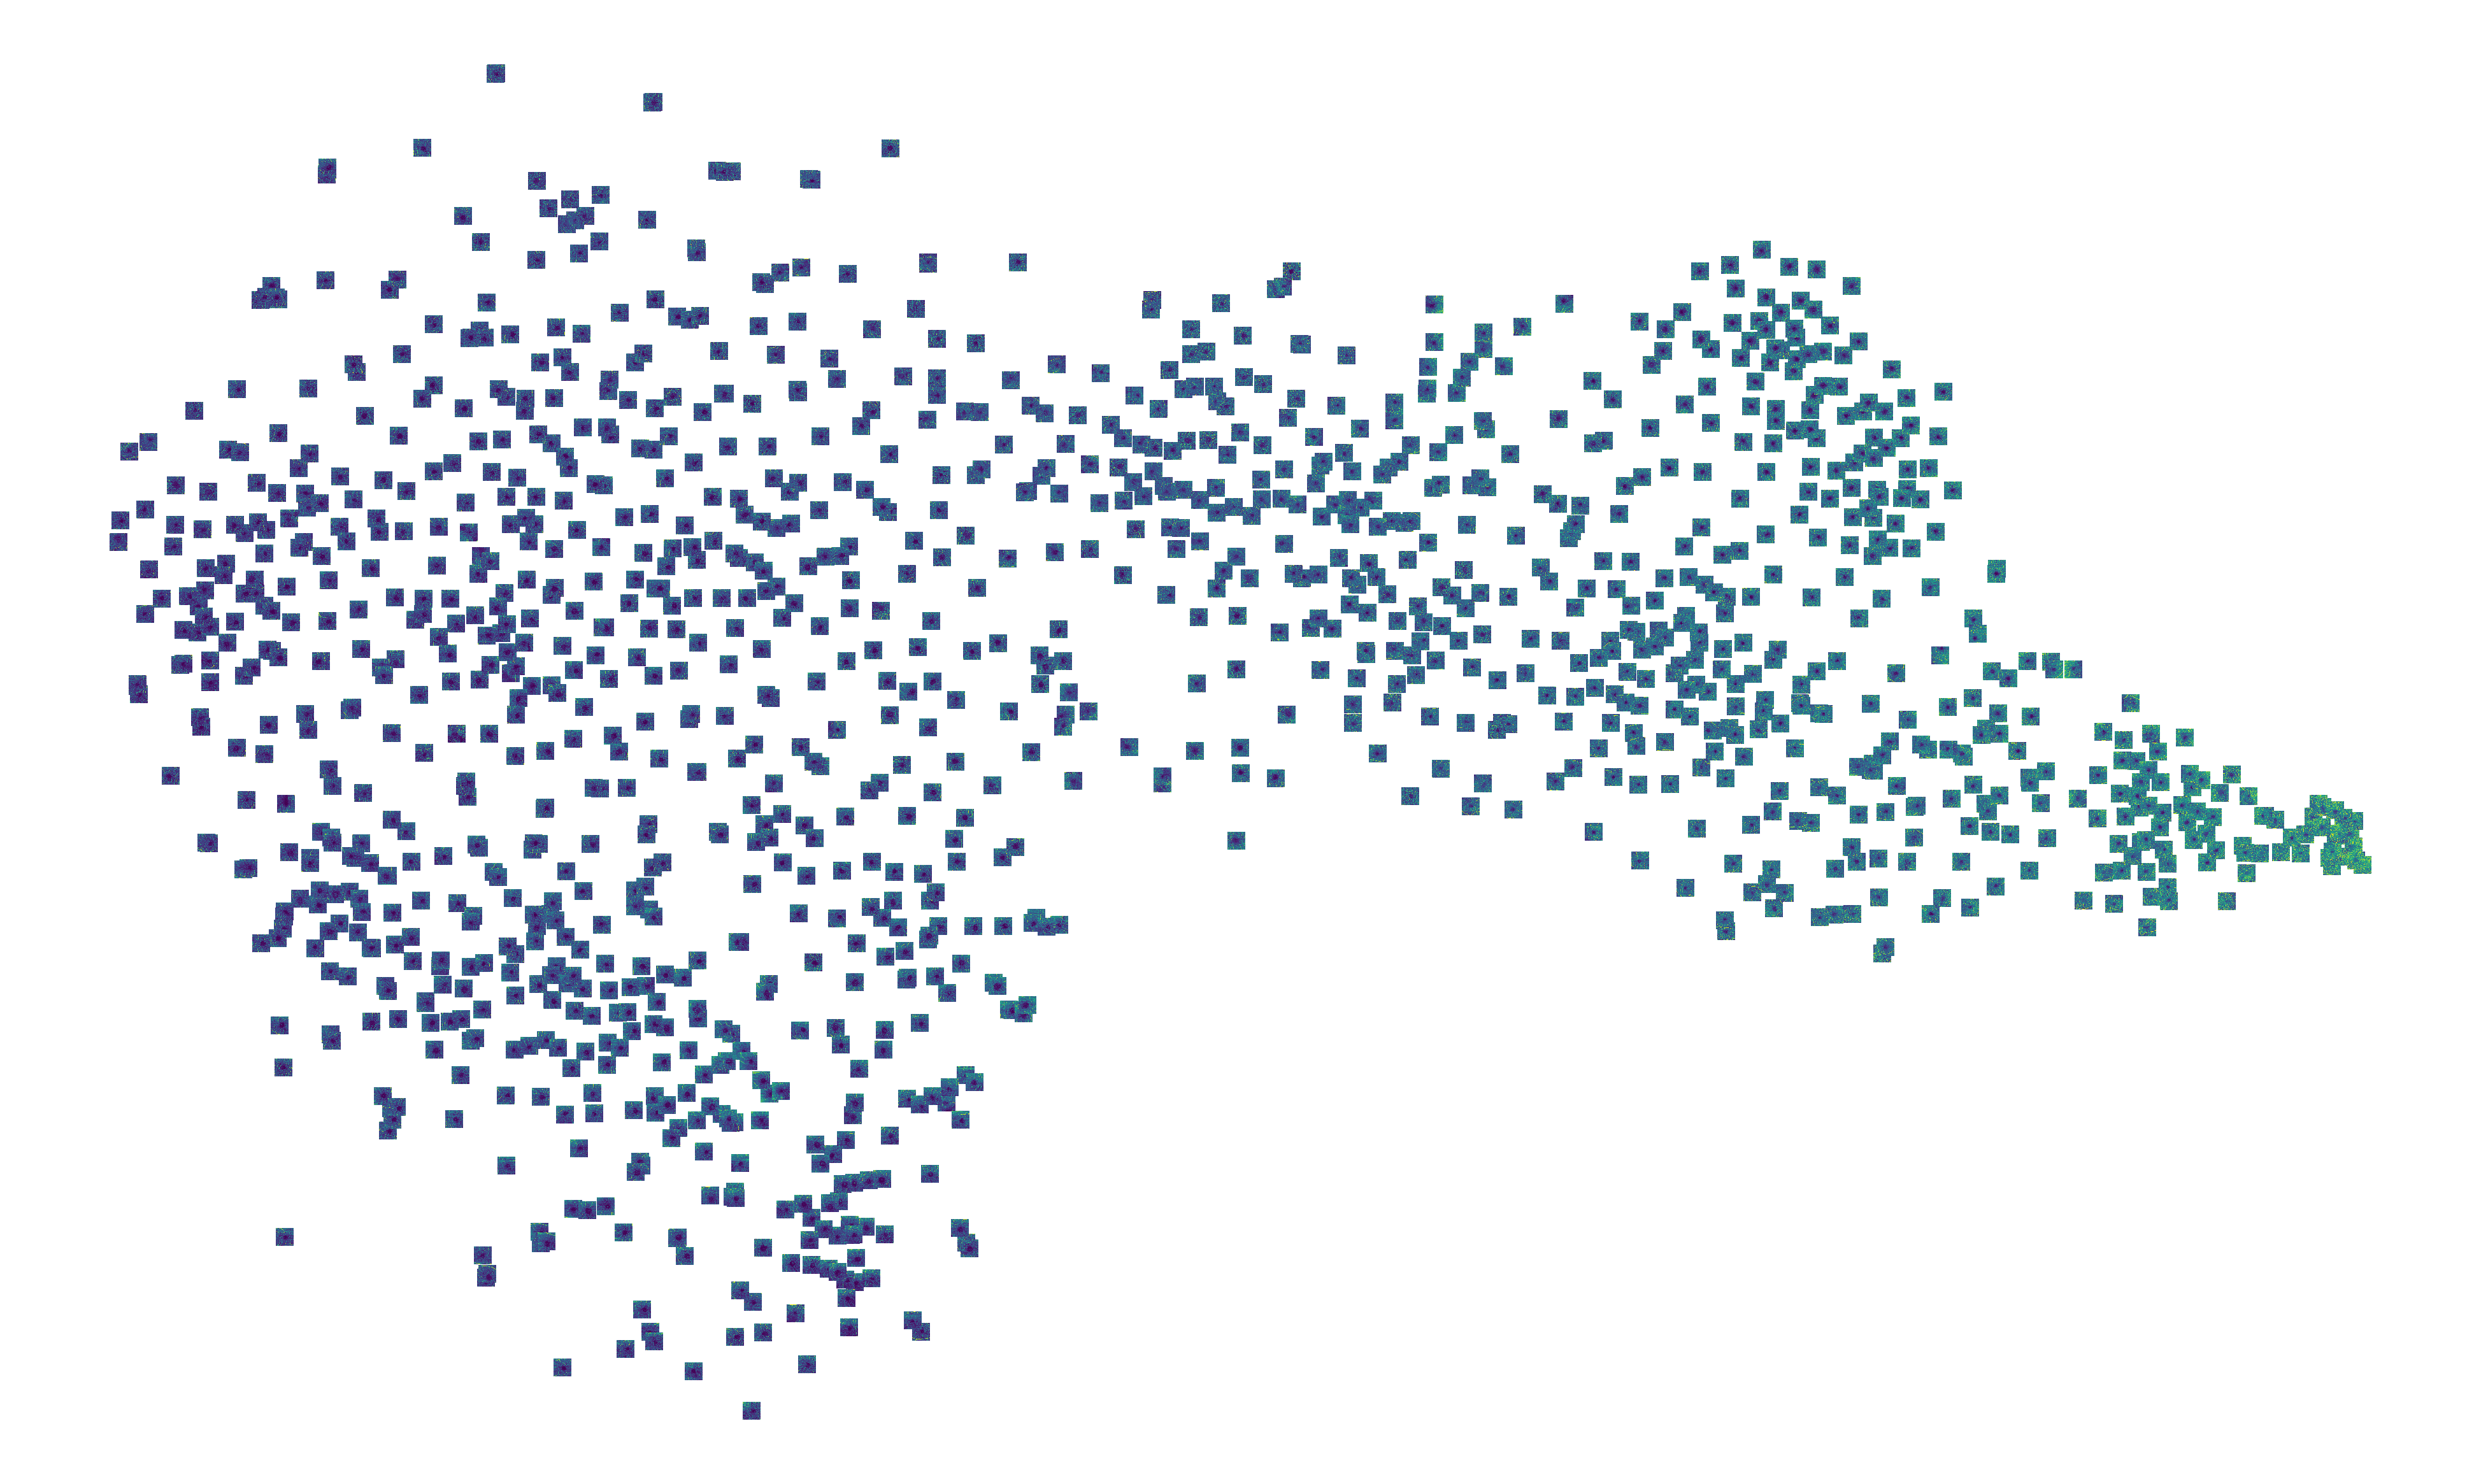

In [4]:
features, img_names = load_images_from_folders(folders)
draw_tsne(features, img_names)

['001_M_1.png', '001_N_1.png', '002_D_10.png', '002_M_10.png', '003_D_100.png', '003_M_100.png', '003_N_11.png', '004_D_101.png', '004_N_12.png', '005_D_102.png', '005_M_102.png', '005_N_13.png', '006_M_103.png', '006_N_14.png', '007_D_104.png', '007_M_104.png', '008_D_105.png', '008_M_105.png', '008_N_16.png', '009_D_106.png', '009_N_17.png', '010_D_107.png', '010_M_107.png', '010_N_18.png', '011_M_108.png', '011_N_19.png', '012_D_12.png', '012_M_109.png', '013_D_13.png', '013_M_11.png', '013_N_20.png', '014_D_14.png', '014_N_21.png', '015_D_15.png', '015_M_13.png', '015_N_22.png', '016_M_14.png', '016_N_23.png', '017_D_17.png', '017_M_15.png', '018_D_18.png', '018_M_16.png', '018_N_25.png', '019_D_19.png', '019_N_26.png', '020_D_2.png', '020_M_18.png', '020_N_27.png', '021_D_20.png', '021_N_28.png', '022_D_21.png', '022_M_2.png', '022_N_29.png', '023_M_20.png', '023_N_3.png', '024_D_23.png', '024_M_21.png', '025_D_24.png', '025_M_22.png', '025_N_31.png', '026_D_25.png', '026_N_32.png

[]